<a href="https://colab.research.google.com/github/Alexeyha/FinNet_Challendge/blob/master/%D0%91%D0%B5%D0%BB%D1%8F%D0%B5%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9_%D0%A4%D0%9C%D0%9B_30_10-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в численные методы
Ниже написан код, реализующий метод простых итераций. Первое задание — подобрать коэффициент так, чтобы метод решал уравнение.

In [1]:
from IPython.display import display
from ipywidgets import FloatSlider

fSlider = FloatSlider(
    value=7.5, # Первоначальное значение
    min=-10.0, # Минимум
    max=10.0,  # Максимум
    step=0.1,  # Шаг изменения
    description='лямбда:',
    continuous_update=False,
    orientation='horizontal'
)

# Функция для решения:
y = lambda x: x**2 - 5*x + 4
# Корни данного уравнения 1 и 4

# Точность
eps = 10**-6

def on_value_change(b):
    print('lambda', '->', b['new'])
    # Приводим к виду для итераций
    phi = lambda x: x - b['new']*y(x)
    x0 = 3.4
    n = 0
    while True:
      try:
        x = phi(x0)
      except OverflowError:
        print('Ошибка: Метод не сошелся')
        break
      if abs(x-x0) < eps:
        break
      x0 = x
      n += 1

    print("Численный ответ: ", x)
    print('Количество итераций: ', n)

fSlider.observe(on_value_change, names='value')
display(fSlider)

FloatSlider(value=7.5, continuous_update=False, description='лямбда:', max=10.0, min=-10.0)

Аналогичное исследование можно провести и для выбора x0. Теперь необходимо понять, когда количество итераций будет минимально:


In [2]:
from IPython.display import display
from ipywidgets import FloatSlider

fSlider = FloatSlider(
    value=7.5, # Первоначальное значение
    min=-10.0, # Минимум
    max=10.0,  # Максимум
    step=0.1,  # Шаг изменения
    description='x0:',
    continuous_update=False,
    orientation='horizontal'
)

# Функция для решения:
y = lambda x: x**2 - 5*x + 4
# Корни данного уравнения 1 и 4

def on_value_change(b):
    print('x0', '->', b['new'])
    # Приводим к виду для итераций
    # В данном примере из-за выбора лямбды метод должен сходится к 4-м
    phi = lambda x: x - 0.5*y(x)
    x0 = b['new']
    n = 0
    while True:
      try:
        x = phi(x0)
      except OverflowError:
        print('Ошибка: Метод не сошелся')
        break
      if abs(x-x0) < eps:
        break
      x0 = x
      n += 1

    print("Численный ответ: ", x)
    print('Количество итераций: ', n)

fSlider.observe(on_value_change, names='value')
display(fSlider)

FloatSlider(value=7.5, continuous_update=False, description='x0:', max=10.0, min=-10.0)

## Метод половинного деления
Ниже представлен "скелет" программы, который надо дополнить так, чтобы получился метод дихотомии:

In [0]:
# fdrkondor@gmail.com

In [4]:
# Функция для решения:
# (Можно написать свою)
y = lambda x: x**3 - x**2 + x - 4
# Корни данного уравнения 1 и 4

# Здесь надо выбрать начальный отрезок:
a = -10
b = 10
# Переменная, в которой будет ответ
x = 0

# Задаем точность:
eps = 10**-6

# Переменная-счетчик числа итераций:
n = 0

# Основной цикл:
while True:
  # Здесь основной код
  # Добавить инкремент переменной счетчика
  # Не забываем прописать условия выхода из цикла!
  n += 1
  x = (a + b) / 2
  if abs(b - a) < 2 * eps or y(x) == 0:
    break
  x = (a+b)/2
  if y(x) < 0:
    a = x
    x = (a+b)/2
  else:
    b = x
  x = (a+b)/2
print('Численный ответ: ', x)
print('Число итераций: ', n)

Численный ответ:  1.7429596185684204
Число итераций:  25


## Метод Ньютона
Как известно, заменив коэффициент лямбда с константы на производную, мы получим метод Ньютона. Модифицируйте код МПИ так, чтобы он стал методом Ньютона и проведите сравнение — какой метод лучше. Для этого оцените число итераций, необходимых для получения результата.

In [5]:
# Функция для решения:
y = lambda x: x**3 - x**2 + x - 4
# Корни данного уравнения 1 и 
l = 0.5
der = lambda x: 3 * x**2 - 2 * x + 1

eps = 10**-4

# Приводим к виду для итераций
phi = lambda x: x - 1/der(x) * y(x)
x0 = 10
n = 0

while True:
  try:
    x = phi(x0)
  except OverflowError:
    print('Ошибка: Метод не сошелся')
    break
  if abs(x-x0) < eps:
    break
  n += 1
  x0 = x

print('Численный ответ: ', x)
print('Число итераций: ', n)

Численный ответ:  1.742959202166315
Число итераций:  8


## Метод секущих
Задание аналогично предыдущему — модифицируйте код так, чтобы получился метод секущих.

In [6]:
# Функция для решения:
y = lambda x: x**3 - x**2 + x - 4
# Корни данного уравнения 1 и 
eps = 10**-4
# Приводим к виду для итераций
# В этом задании phi специально сделана функцией двух переменных,
# так как для разностной схемы надо предыдущее значение x
der = lambda x, x0: (y(x)-y(x0))/(x-x0)
phi = lambda x, x0: x - 1 / der(x, x0) * y(x)
x0 = 10
n = 0
x = x0 + eps
while True:
  try:
    x0, x = x, phi(x, x0)
  except OverflowError:
    print('Ошибка: Метод не сошелся')
    break
  n += 1
  if abs(x-x0) < eps:
    break
  

print('Численный ответ: ', x)
print('Число итераций: ', n)

Численный ответ:  1.7429592676094483
Число итераций:  11


## Метод одной касательной
Аналогично: модифицируйте предложенный метод так, чтобы получился методн одной касательной.

In [7]:
# Функция для решения:
y = lambda x: x**3 - x**2 + x - 4
# Корни данного уравнения 1 и 
der = lambda x: 3 * x**2 - 2 * x + 1
x0 = 3.4
l = 1 / der(x0)

eps = 10**-4

# Приводим к виду для итераций
phi = lambda x: x - l*y(x)

while True:
  try:
    x = phi(x0)
  except OverflowError:
    print('Ошибка: Метод не сошелся')
    break
  if abs(x-x0) < eps:
    break
  n += 1
  x0 = x

print('Численный ответ: ', x)
print('Число итераций: ', n)

Численный ответ:  1.7432444613610614
Число итераций:  39


Лучшее значение по количеству итераций показал метод Ньютона.

# Интегрирование

Функция: exp(2x) / (x^2+1) * sin(x)

Промежуток: от -2 до 3

Количество промежутков: 50 (Для метода трапеции)

Количество узлов: 6 (Для метода Гаусса)

In [0]:
import math

## Метод трапеции

In [0]:
def int_trap(func, a, b, n):
  if a > b:
    a, b = b, a
  d = (b - a) / float(n)
  res = sum([(0.5 * d * (func(a + (i * d)) + func(a  + ((i + 1) * d)))) for i in range(n)])
  return res

In [10]:
func = lambda x: math.exp(2*x) * math.sin(x) / (x**2 + 1)
a = 1
b = 3
n = 1000
int_trap(func, a, b, n)

17.126492385714876

## Метод Гаусса

In [0]:
import numpy as np

In [0]:
def data_pre(x, a, b):
  return np.array([(a+b)/2]*6) + (b-a)/2 * np.array(x)

In [0]:
def int_gaus(func, a, b):
  x = [-0.93247, -0.6612094, -0.2386142, 0.2386142, 0.6612094, 0.93247]
  k = [0.1713245, 0.3607616, 0.467914, 0.4679140, 0.3607616, 0.1713245]
  x = data_pre(x, a, b)
  res = sum([(k[i] * func(x[i])) for i in range(6)]) * (b-a)/2
  return res

In [14]:
func = lambda x: math.exp(2*x) * math.sin(x) / (x**2 + 1)
a = 1
b = 3
int_gaus(func, a, b)

17.126509378965775

Численно ответы совпали с правильным.

## Метод Эйлера

In [0]:
def int_el(x0, v0, c, m, g, n):
  x = [x0]
  v = [v0]
  a = 0
  dt = 0.01
  for i in range(n):
    a = g - c * x[i] / m
    v.append(v[i] + a * dt)
    x.append(x[i] + v[i+1]*dt)
  return x, v

In [0]:
x0 = 0
v0 = 12
c = 150
m = 3
g = 9.81
n = 1000
x, v = int_el(x0, v0, c, m, g, n)

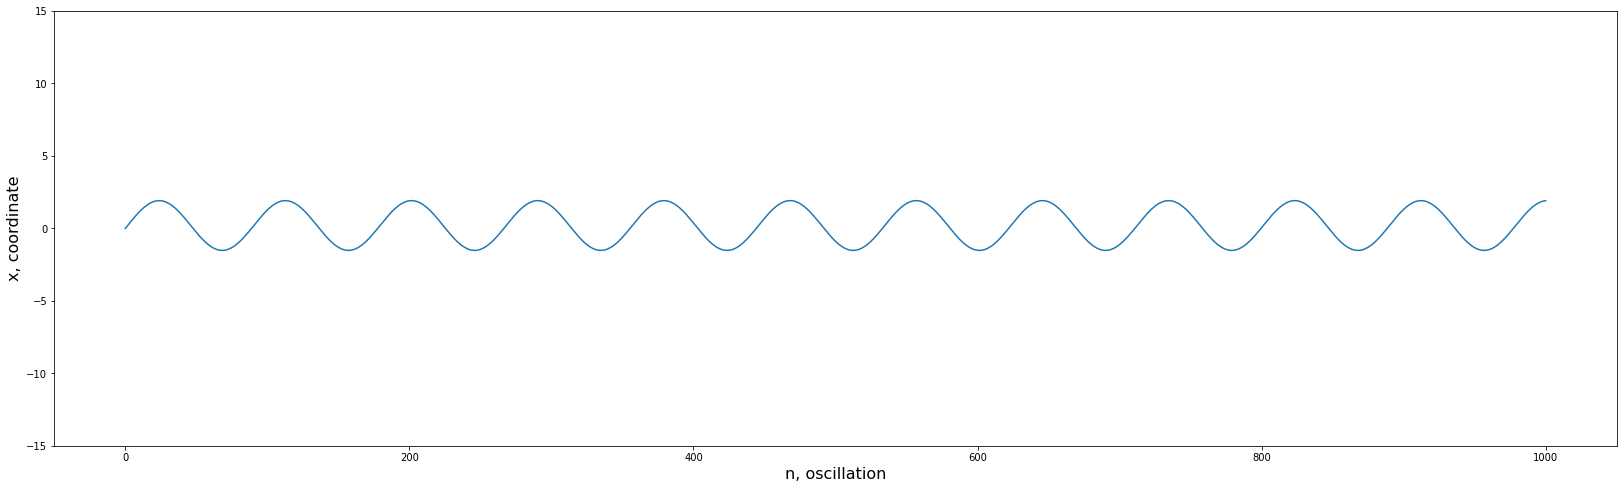

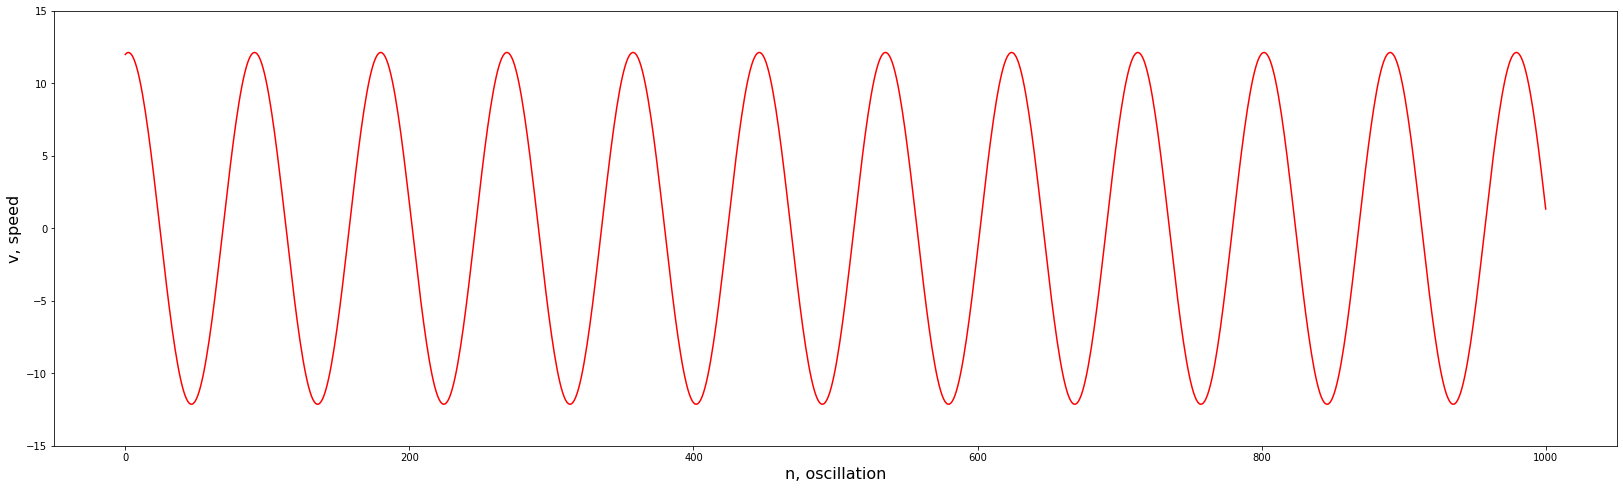

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28, 8))
plt.plot(x)
plt.xlabel("n, oscillation", size=16)
plt.ylabel("x, coordinate", size=16)
plt.ylim(-15, 15)
plt.show()
plt.figure(figsize=(28, 8))
plt.plot(v, color='red')
plt.xlabel("n, oscillation", size=16)
plt.ylabel("v, speed", size=16)
plt.ylim(-15, 15)
plt.show()